In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
def plot_polar(detections):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='polar')

    ax.scatter(detections['Azi_rad'], detections['Depth'], alpha=0.75)

    ax.set_thetamin(-90)
    ax.set_thetamax(90)
    ax.set_theta_zero_location('N')

    plt.show()


def plot_vel(detections):
    plt.figure(figsize=(10, 10))
    plt.scatter(detections['Frame'], detections['Vel'])
    plt.show()


def plot_distance(detections):
    plt.figure(figsize=(10, 10))
    plt.scatter(detections['Frame'], detections['Depth'])
    plt.grid(True)
    plt.show()


def plot_azi(detections):
    plt.figure(figsize=(10, 10))
    plt.scatter(detections['Frame'], detections['Azi'])
    plt.show()

In [8]:
all_detections = pd.read_csv('../../data/real/TABULAR_CSV_ALL_CLASSES.csv')

In [17]:
all_detections['Exp'].str.contains('EXP_17').sum() * 128

929536

In [21]:
detections = all_detections[all_detections['Exp'].str.contains('EXP_17')].query('Class == "Motorcycle"')
detections['Azi_rad'] = [math.radians(azi) for azi in detections['Azi']]
detections['Frame_chirp'] = [(frame + 1) * 128 for frame in detections['Frame']]
detections = detections.query('Frame < 100')


In [33]:
detections

,Unnamed: 0,Frame,TargetIndex,Depth,Vel,Azi,peakRA,areaRA,minRA,meanRA,peakRD,areaRD,minRD,meanRD,Class,Exp,Azi_rad,Frame_chirp
26700,5,53,0,29.708466,-16.064444,-9.896853,-45.036196,20.0,-47.036196,-45.369529,-83.832253,63.0,-97.832253,-89.934817,Motorcycle,EXP_17_C,-0.172733,6912
26701,6,54,0,29.168312,-16.064444,3.583322,-43.796182,36.5,-48.796182,-45.775773,-76.743306,111.5,-97.743306,-86.109718,Motorcycle,EXP_17_C,0.062541,7040
26705,10,55,0,28.808209,-16.064444,3.583322,-41.249541,50.0,-47.249541,-43.995573,-77.249564,134.0,-98.249564,-88.682685,Motorcycle,EXP_17_C,0.062541,7168
26708,13,56,1,28.358081,-16.289122,2.686724,-46.668711,13.5,-47.668711,-46.968711,-84.630459,161.5,-97.630459,-90.065242,Motorcycle,EXP_17_C,0.046892,7296
26718,23,58,6,27.817927,-16.289122,5.379379,-47.151126,22.5,-49.151126,-48.022093,-81.901144,152.0,-97.901144,-89.257466,Motorcycle,EXP_17_C,0.093888,7552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155251,11,3,9,1.440410,5.279922,1.790785,-22.698544,43.5,-25.698544,-23.986680,-46.710913,278.5,-77.710913,-63.461701,Motorcycle,EXP_17_Q,0.031255,512
155254,14,4,0,1.620462,3.707179,-11.719760,-26.338000,13.5,-28.338000,-26.957048,-51.537414,559.5,-80.537414,-66.616278,Motorcycle,EXP_17_Q,-0.204548,640
155257,17,4,3,1.800513,3.707179,-37.544325,-28.338000,104.5,-38.338000,-31.377370,-51.537414,559.5,-80.537414,-66.616278,Motorcycle,EXP_17_Q,-0.655272,640
155258,18,5,0,1.710487,9.548796,-38.682187,-21.219451,159.5,-38.219451,-28.411964,-51.112321,691.0,-82.112321,-66.033814,Motorcycle,EXP_17_Q,-0.675132,768


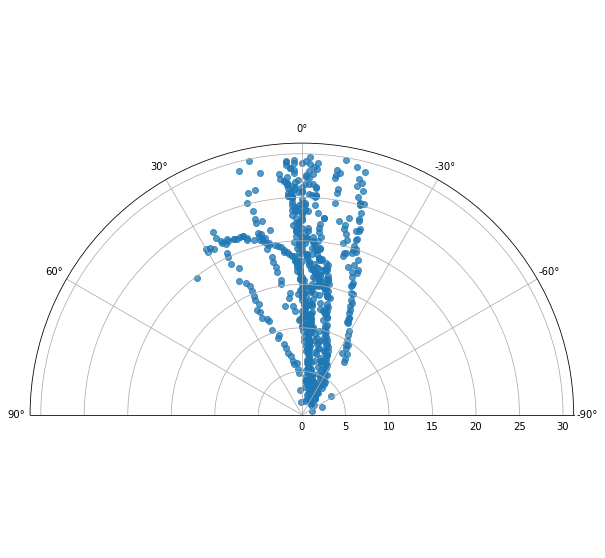

In [25]:
plot_polar(detections)

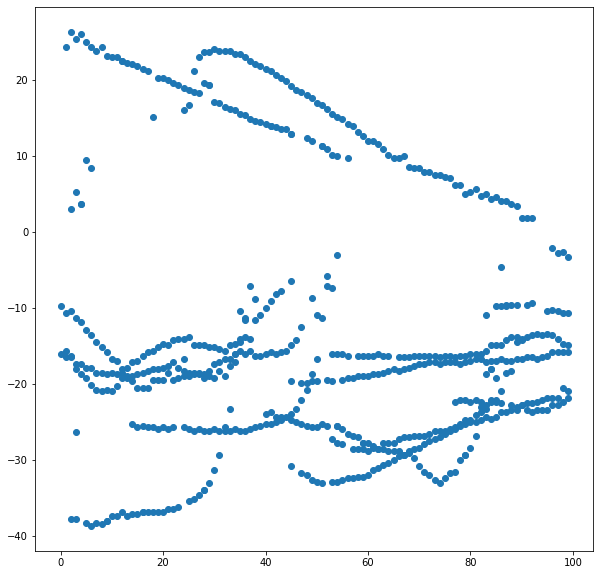

In [26]:
plot_vel(detections)

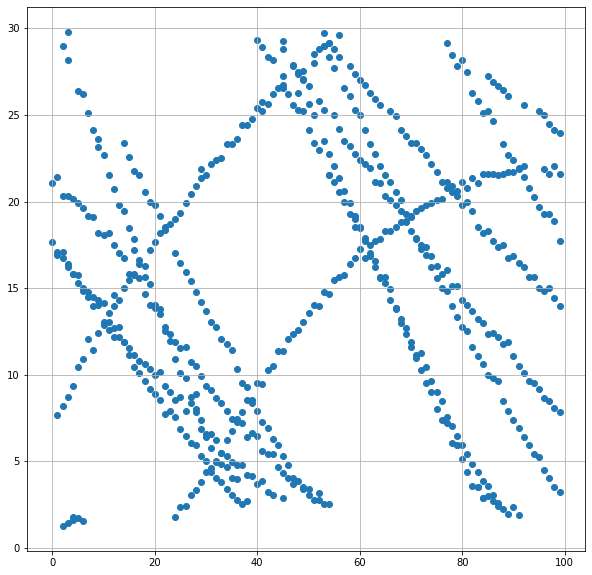

In [27]:
plot_distance(detections)

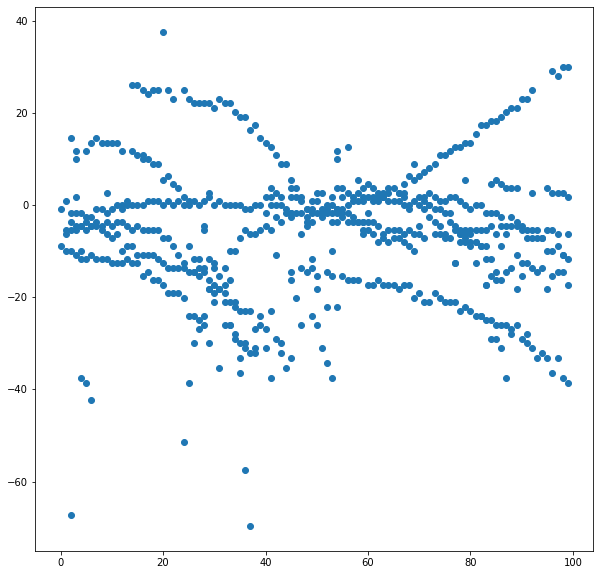

In [28]:
plot_azi(detections)

# Same as labeled

In [30]:
(detections['Frame'].iloc[3]) * 128, (detections['Frame'].iloc[-1]) * 128 + 128

(7168, 896)

In [33]:
distances = detections.iloc[3:]['Depth'].to_numpy()
distances = np.repeat(distances, 128)
distances = np.asmatrix(distances).T

In [34]:
distances

matrix([[26.55756766],
        [26.55756766],
        [26.55756766],
        ...,
        [15.03428406],
        [15.03428406],
        [15.03428406]])

In [35]:
distances[-1000, 0]

19.26548975844223

In [36]:
distances.shape

(2560, 1)

# Regression

In [71]:
x = detections['Frame_chirp'].array
y = detections['Depth'].array

model = np.poly1d(np.polyfit(x, y, 1))

print(model)

 
-0.004429 x + 59.12


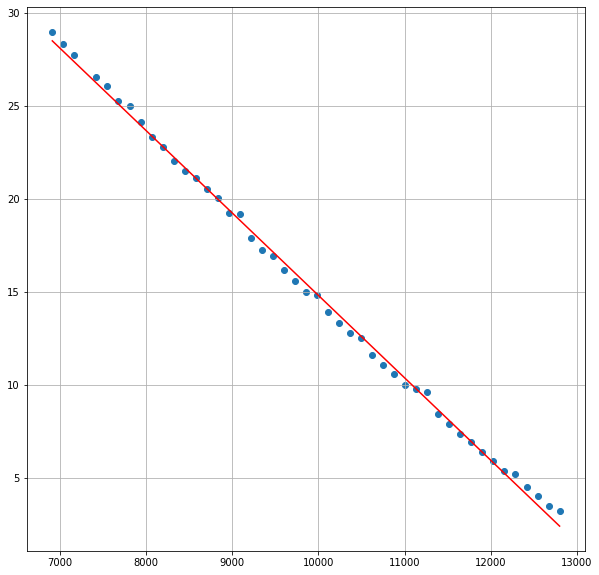

In [72]:
line = np.linspace(x[0], x[-1], 300)

plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.plot(line, model(line), color='red')
plt.grid(True)
plt.show()

In [73]:
frames = [[frame for frame in range(10_000, 13_320)]]

distances = model(frames).T

In [74]:
print(distances.mean(), distances.std())

7.478461596623961 4.245048781128918


# Scale conditions

In [37]:
distances.max(), distances.min()

(26.55756765766569, 15.034284063831086)

In [38]:
distances_scaled_generator = (distances - distances.mean()) / distances.std()
distances_scaled_discriminator = -1 + ((distances - distances.min())*2) / (distances.max() - distances.min())

In [39]:
distances.mean(), distances.std()

(20.79592586074839, 3.506380730535101)

In [20]:
distances_scaled = np.array([distances_scaled_generator, distances_scaled_discriminator])

In [21]:
np.save('../data/real/EXP_17_M_more15m_labels.npy', distances_scaled.astype(np.float32))